<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("patient_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [5]:
# Hasil pemisahan X dan Y
print(X, '\n')
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# Model dengan hyperparemeter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

# Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, Y_train)

In [10]:
# hasil prediksi training set
Y_pred_train_default = model_default.predict(X_train)

# hasil prediksi test set
Y_pred_default = model_default.predict(X_test)

# Train set Score
print("Train Accuracy   : ", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Precission : ", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Recall     : ", metrics.accuracy_score(Y_train, Y_pred_train_default), '\n')

# Test set Score
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Precision   : ", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Recall      : ", metrics.accuracy_score(Y_test, Y_pred_default))
#

Train Accuracy   :  1.0
Train Precission :  1.0
Train Recall     :  1.0 

Test set Accuracy:  0.7467532467532467
Test Precision   :  0.7467532467532467
Test Recall      :  0.7467532467532467


In [13]:
# hasil prediksi training set
Y_pred_train = model_DT.predict(X_train)

# hasil prediksi test set
Y_pred = model_DT.predict(X_test)

# Train set Score
print("Train Accuracy   : ", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Precission : ", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Recall     : ", metrics.accuracy_score(Y_train, Y_pred_train)), '\n'

# Test set Score
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Precision   : ", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Recall      : ", metrics.accuracy_score(Y_test, Y_pred_default))


Train Accuracy   :  0.7719869706840391
Train Precission :  0.7719869706840391
Train Recall     :  0.7719869706840391
Test set Accuracy:  0.7727272727272727
Test Precision   :  0.7727272727272727
Test Recall      :  0.7727272727272727


In [14]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Modal dengan Hyperparameter Default:\n')
print(classification_report(Y_test, Y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
print(classification_report(Y_test, Y_pred, target_names=nama_label))

Classification Report Modal dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification Report Model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Tree Model dengan Hyperparameter Default

In [17]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

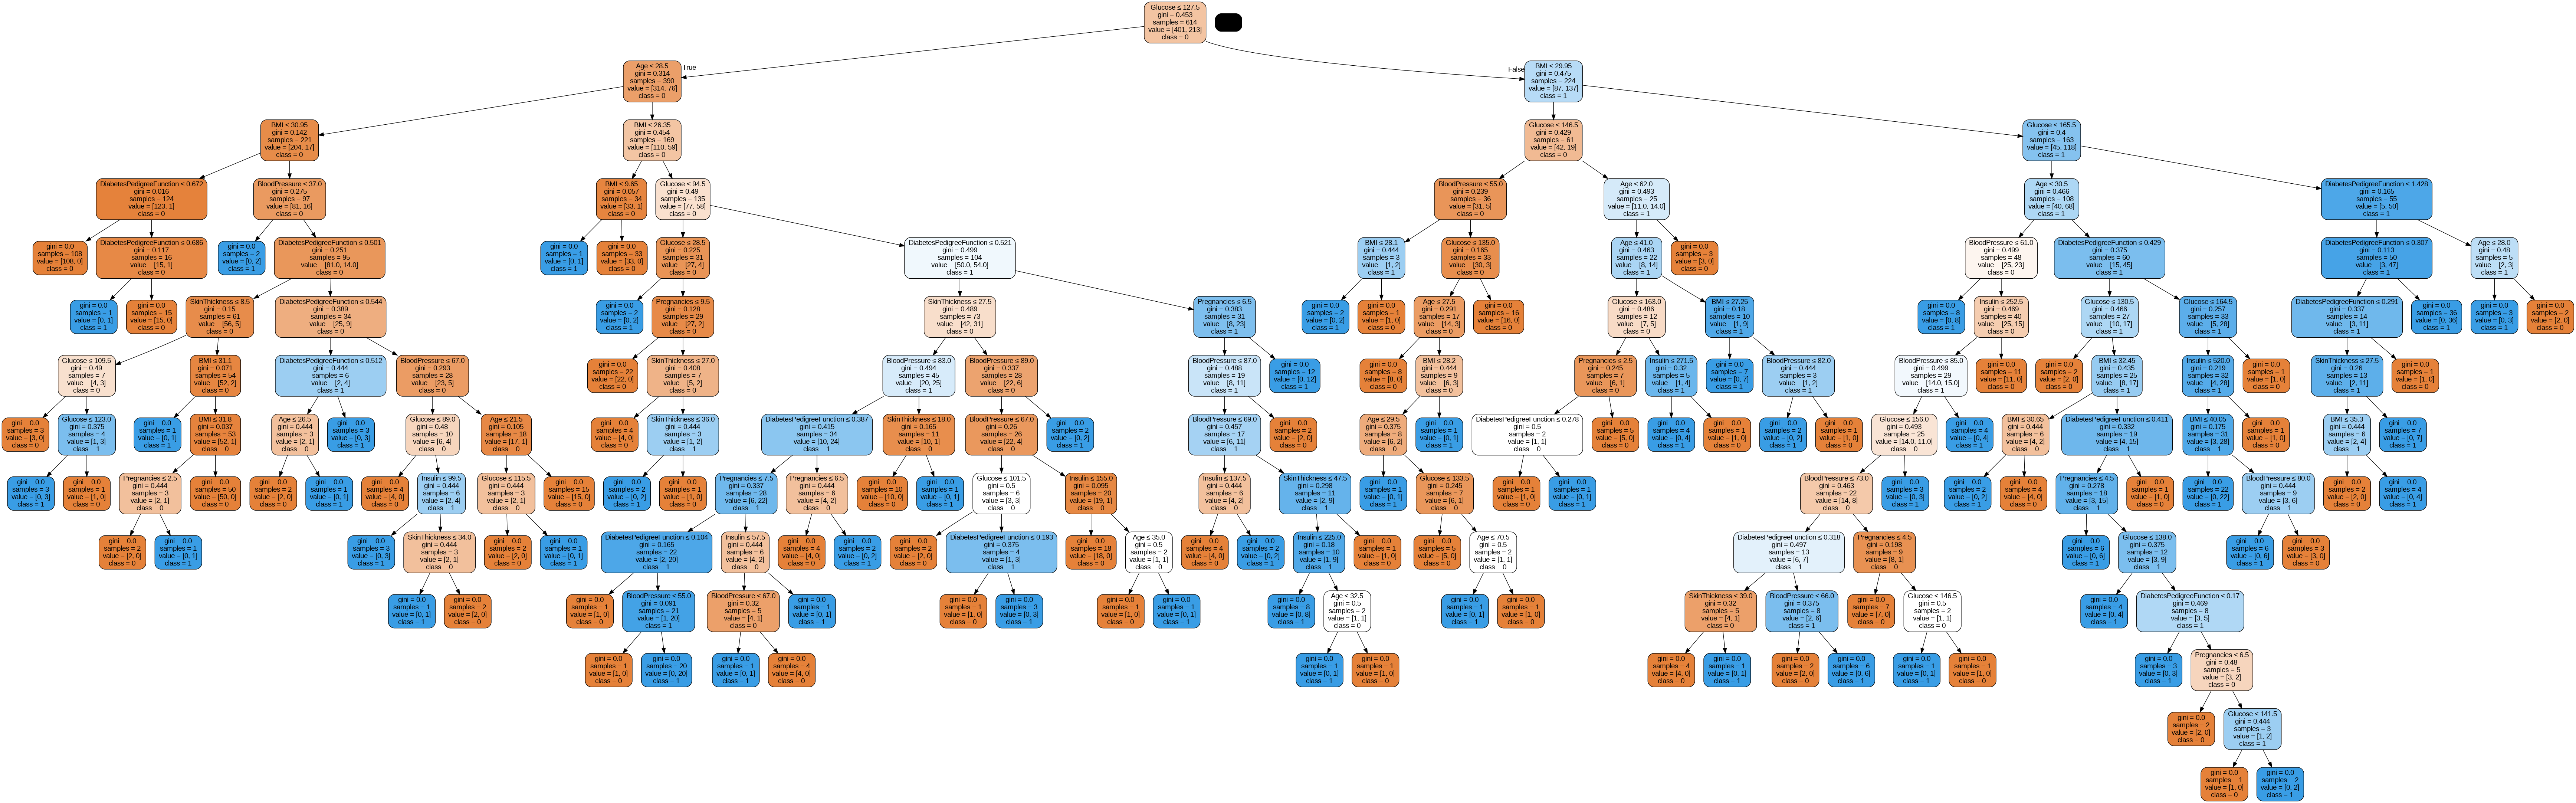

In [18]:

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_defaultf.png')
Image(graph.create_png())


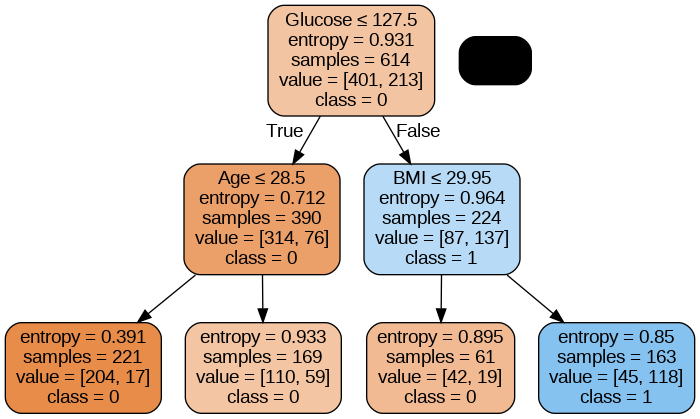

In [19]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())


**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

Feature: Pregnancies Score:  0.04909482625649486 %
Feature: Glucose Score:  0.3285933858991838 %
Feature: BloodPressure Score:  0.14911679453855756 %
Feature: SkinThickness Score:  0.05650124792245124 %
Feature: Insulin Score:  0.05109137759628008 %
Feature: BMI Score:  0.15236941433587772 %
Feature: DiabetesPedigreeFunction Score:  0.09712043223426078 %
Feature: Age Score:  0.11611252121689401 %


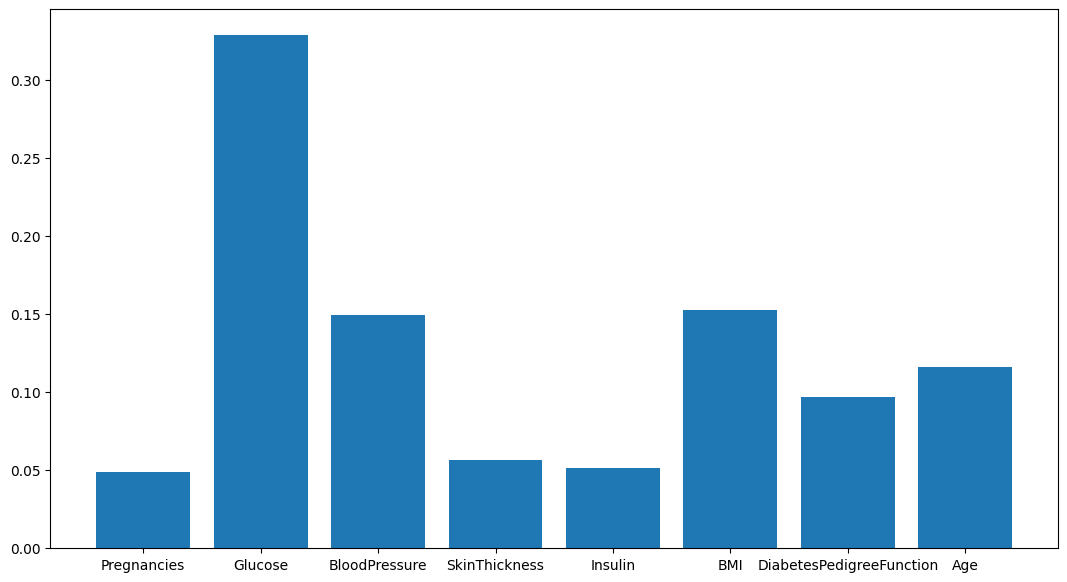

In [25]:
improtance = model_default.feature_importances_

for i,v in enumerate(improtance):
  print('Feature:', feature_cols[i],'Score: ', v, '%')

#membuat file
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], improtance)
plt.show()

Kesimpulan


Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model

In [28]:
#prediksi data baru menggunakan model dengan tuning hyperparameter

# input data baru
Pregnancies = float(input('Pregnancies: '))
Glucose = float(input('Glucose: '))
BloodPressure = float(input('BloodPressure: '))
SkinThickness = float(input('SkinThickness: '))
Insulin = float(input('Insulin: '))
BMI = float(input('BMI: '))
DiabetesPedigreeFunction = float(input('DiabetesPedigreeFunction: '))
Age = float(input('Age: '))
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

#Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi: int(hasil_prediksi)

#cetak hasil prediksi
if hasil_prediksi == 0:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes!')

Pregnancies: 7
Glucose: 7
BloodPressure: 7
SkinThickness: 7
Insulin: 7
BMI: 7
DiabetesPedigreeFunction: 7
Age: 7

Tidak berpotensi menderita diabetes!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-28-83200bd13c90>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi: int(hasil_prediksi)
